In [1]:
print("test")

test


In [4]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [5]:
pd.Series

pd.DataFrame

pandas.core.frame.DataFrame

In [11]:
from faker import Faker

fake = Faker()


def generate_names(n:int = 4) -> list[str]:
    fake_names = []
    for _ in range(n):
        fake_names.append(fake.first_name())

    return fake_names

def generate_age(n:int = 4) -> list[int]:
    fake_age = []
    for _ in range(n):
        fake_age.append(fake.random_int(min=1, max=120))

    return fake_age


In [22]:
data = {"Name" : generate_names(90),
        "Age" : generate_age(90)}

data

{'Name': ['Carlos',
  'Keith',
  'Mary',
  'Rachel',
  'Ebony',
  'Karen',
  'Martin',
  'William',
  'Darren',
  'Brittany',
  'Sharon',
  'Jorge',
  'Raymond',
  'Joy',
  'Tyler',
  'Robin',
  'Tracy',
  'Dustin',
  'Kenneth',
  'Alison',
  'Emma',
  'Patricia',
  'Lauren',
  'Joshua',
  'Deborah',
  'Omar',
  'John',
  'Mariah',
  'Lisa',
  'Frederick',
  'John',
  'Brandy',
  'Mercedes',
  'Jennifer',
  'Keith',
  'Jeffrey',
  'Andrew',
  'Victoria',
  'Erica',
  'Jennifer',
  'Colleen',
  'Emily',
  'Margaret',
  'William',
  'Mary',
  'John',
  'James',
  'David',
  'Laura',
  'Adam',
  'Dakota',
  'Ronnie',
  'Stephen',
  'William',
  'Sue',
  'Michael',
  'Matthew',
  'Christopher',
  'Connor',
  'Matthew',
  'Shane',
  'Mary',
  'Shelby',
  'Kristy',
  'Shannon',
  'Steven',
  'Christopher',
  'Ruben',
  'Madison',
  'Adam',
  'Kimberly',
  'William',
  'Melissa',
  'Jaclyn',
  'Sharon',
  'Paul',
  'Emily',
  'Jennifer',
  'Stefanie',
  'Stephanie',
  'Michelle',
  'Sherry',


In [23]:
pd.DataFrame(data)

,Name,Age
0,Carlos,3
1,Keith,19
2,Mary,30
3,Rachel,113
4,Ebony,68
...,...,...
85,Kyle,28
86,Jonathan,69
87,Amy,42
88,Megan,47


In [24]:
df = pd.DataFrame(data)

In [25]:
df["Name"]

0       Carlos
1        Keith
2         Mary
3       Rachel
4        Ebony
        ...   
85        Kyle
86    Jonathan
87         Amy
88       Megan
89      Angela
Name: Name, Length: 90, dtype: object

In [26]:
df["Age"]

0       3
1      19
2      30
3     113
4      68
     ... 
85     28
86     69
87     42
88     47
89     96
Name: Age, Length: 90, dtype: int64

In [27]:
mask = df["Age"] >= 30 

In [28]:
df[mask]

,Name,Age
2,Mary,30
3,Rachel,113
4,Ebony,68
5,Karen,42
7,William,73
...,...,...
82,Brian,73
86,Jonathan,69
87,Amy,42
88,Megan,47


In [29]:
df.groupby("Name").agg(
    {"Age":"mean"}
)

,Age
Name,
Adam,76.50
Alison,31.00
Amy,42.00
Andrew,54.00
Angela,96.00
...,...
Sue,106.00
Tracy,37.00
Tyler,27.00


In [30]:
df.groupby("Name").agg(
    {"Age":"max"}
)

,Age
Name,
Adam,104
Alison,31
Amy,42
Andrew,54
Angela,96
...,...
Sue,106
Tracy,37
Tyler,27


In [31]:
df.index

RangeIndex(start=0, stop=90, step=1)

In [32]:
df.drop_duplicates()

,Name,Age
0,Carlos,3
1,Keith,19
2,Mary,30
3,Rachel,113
4,Ebony,68
...,...,...
85,Kyle,28
86,Jonathan,69
87,Amy,42
88,Megan,47


In [33]:
df.reset_index(drop=True)

,Name,Age
0,Carlos,3
1,Keith,19
2,Mary,30
3,Rachel,113
4,Ebony,68
...,...,...
85,Kyle,28
86,Jonathan,69
87,Amy,42
88,Megan,47


In [36]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [37]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Matplotlib is building the font cache; this may take a moment.
[*********************100%***********************]  1 of 1 completed


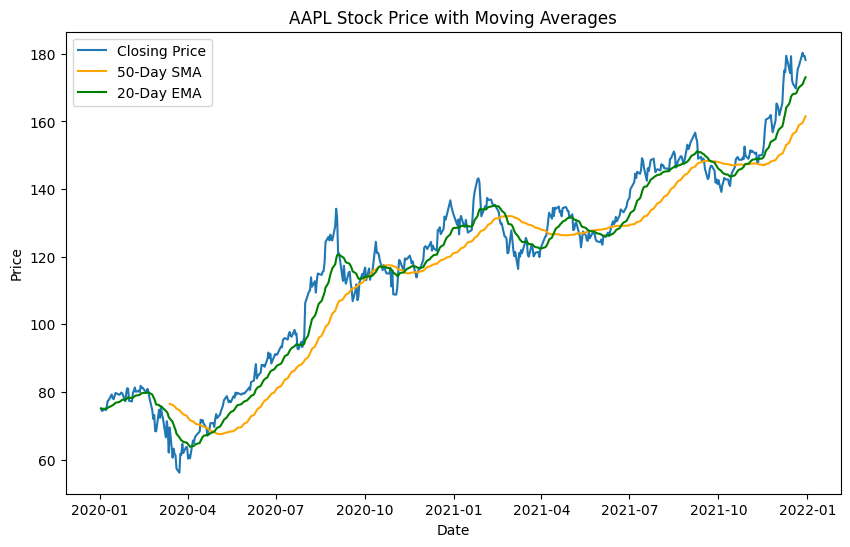

In [35]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
 
# Define the stock symbol and fetch historical data
stock_symbol = 'AAPL'  # Example: Apple Inc.
data = yf.download(stock_symbol, start='2020-01-01', end='2021-12-31')
 
# Calculate 50-day Simple Moving Average (SMA)
data['SMA_50'] = data['Close'].rolling(window=50).mean()
 
# Calculate 20-day Exponential Moving Average (EMA)
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()
 
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Closing Price')
plt.plot(data.index, data['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(data.index, data['EMA_20'], label='20-Day EMA', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{stock_symbol} Stock Price with Moving Averages')
plt.legend()
plt.show()